In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.ticker as ticker
from matplotlib import rc

names_latency=['submission_time', 'duration', 'op2', 'write_size', 'op3']
columns = ['duration']

Number of writes with latency below the 50th percentile: 23040
Number of writes with latency above the 50th percentile: 23040
Number of writes with latency above the 90th percentile: 4608
Number of writes with latency above the 99th percentile: 461
Number of writes 46080
Number of writes: 46079
Number of writes: 46080


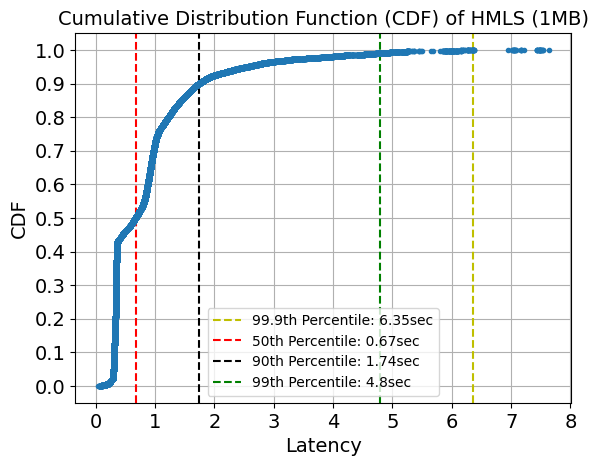

In [280]:
# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/home/surbhi/measurements/worst_case/lsdm/lsdm-util/90Util/1MB/8TB/90-10-LBA/45GB/lat_log_avg_lat.1.log', names=names_latency)

df['duration'] = df['duration']/1e9
# Step 1: Sort the data
data_sorted = np.sort(df['duration'])

# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Step 3: Calculate 50th, 90th and 99th percentiles4
p50 = np.percentile(data_sorted, 50)
p90 = np.percentile(data_sorted, 90)
p99 = np.percentile(data_sorted, 99)
p999 = np.percentile(data_sorted, 99.9)
plt.axvline(x=p999, color='y', linestyle='--', label='99.9th Percentile: ' + str(round(p999, 2)) + "sec")


# Step 4: Plot the CDF
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# Mark the 90th and 99th percentiles with vertical lines
plt.axvline(x=p50, color='r', linestyle='--', label='50th Percentile: ' + str(round(p50, 2)) + "sec" )
plt.axvline(x=p90, color='black', linestyle='--', label='90th Percentile: ' + str(round(p90, 2)) + "sec" )
plt.axvline(x=p99, color='g', linestyle='--', label='99th Percentile: ' + str(round(p99, 2)) + "sec")

plt.legend()
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot(data_sorted, cdf, marker='.', linestyle='none')
plt.xlabel('Latency', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.title('Cumulative Distribution Function (CDF) of HMLS (1MB)', fontsize=14)
plt.grid(True)
plt.show()

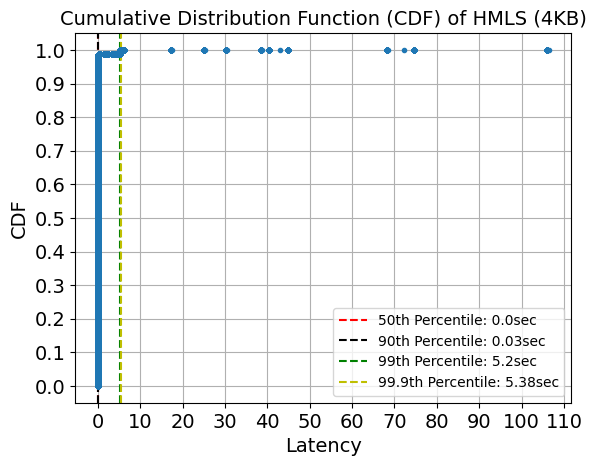

In [288]:
# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/home/surbhi/measurements/worst_case/lsdm/4K/90-10-LBA/90Util/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)

df['duration'] = df['duration']/1e9
# Step 1: Sort the data
data_sorted = np.sort(df['duration'])

# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Step 3: Calculate 90th and 99th percentiles
p50 = np.percentile(data_sorted, 50)
p90 = np.percentile(data_sorted, 90)
p99 = np.percentile(data_sorted, 99)

# Step 4: Plot the CDF
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# Mark the 90th and 99th percentiles with vertical lines
plt.axvline(x=p50, color='r', linestyle='--', label='50th Percentile: ' + str(round(p50, 2)) + "sec" )
plt.axvline(x=p90, color='black', linestyle='--', label='90th Percentile: ' + str(round(p90, 2)) + "sec" )
plt.axvline(x=p99, color='g', linestyle='--', label='99th Percentile: ' + str(round(p99, 2)) + "sec")
p999 = np.percentile(data_sorted, 99.9)
plt.axvline(x=p999, color='y', linestyle='--', label='99.9th Percentile: ' + str(round(p999, 2)) + "sec")
plt.legend()

plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 120, 10))
plt.plot(data_sorted, cdf, marker='.', linestyle='none')
plt.xlabel('Latency', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.title('Cumulative Distribution Function (CDF) of HMLS (4KB)', fontsize=14)
plt.grid(True)
plt.show()

Number of writes with duration between 60 and 125: 13
Number of writes with duration between 225 and 400: 38


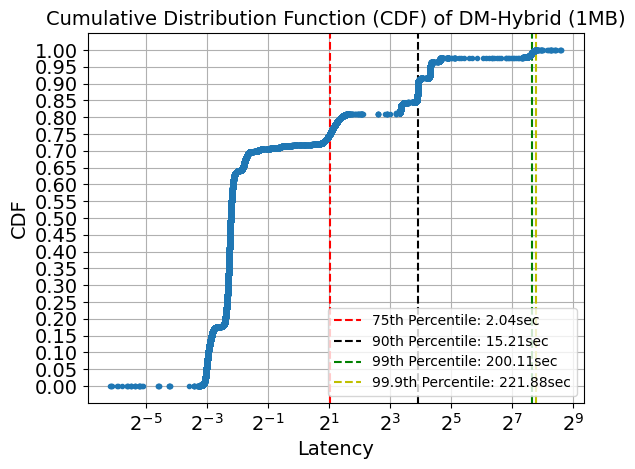

In [333]:
# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv(f'/home/surbhi/measurements/worst_case/STL/1M/90-10-LBA/90Util/run1/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)

df['duration'] = df['duration']/1e9
# Step 1: Sort the data
data_sorted = np.sort(df['duration'])

x=60
y=125
# Filter the DataFrame where the 'duration' column is between x and y
filtered_df = df[(df['duration'] >= x) & (df['duration'] <= y)]

# Count the number of rows that meet the condition
num_writes = len(filtered_df)

print(f"Number of writes with duration between {x} and {y}: {num_writes}")

x=225
y=400
# Filter the DataFrame where the 'duration' column is between x and y
filtered_df = df[(df['duration'] >= x) & (df['duration'] <= y)]

# Count the number of rows that meet the condition
num_writes = len(filtered_df)

print(f"Number of writes with duration between {x} and {y}: {num_writes}")

# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Step 3: Calculate 90th and 99th percentiles
p50 = np.percentile(data_sorted, 50)
p75 = np.percentile(data_sorted, 75)
p90 = np.percentile(data_sorted, 90)
p99 = np.percentile(data_sorted, 99)
p999 = np.percentile(data_sorted, 99.9)

# Step 4: Plot the CDF
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# Mark the 90th and 99th percentiles with vertical lines
plt.axvline(x=p75, color='r', linestyle='--', label='75th Percentile: ' + str(round(p75, 2)) + "sec" )
plt.axvline(x=p90, color='black', linestyle='--', label='90th Percentile: ' + str(round(p90, 2)) + "sec" )
plt.axvline(x=p99, color='g', linestyle='--', label='99th Percentile: ' + str(round(p99, 2)) + "sec")
plt.axvline(x=p999, color='y', linestyle='--', label='99.9th Percentile: ' + str(round(p999, 2)) + "sec")
plt.xscale('log', base=2)

plt.legend()
plt.yticks(np.arange(0, 1.1, 0.05))
plt.plot(data_sorted, cdf, marker='.', linestyle='none')
plt.xlabel('Latency', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.title('Cumulative Distribution Function (CDF) of DM-Hybrid (1MB)', fontsize=14)
plt.grid(True)
plt.show()

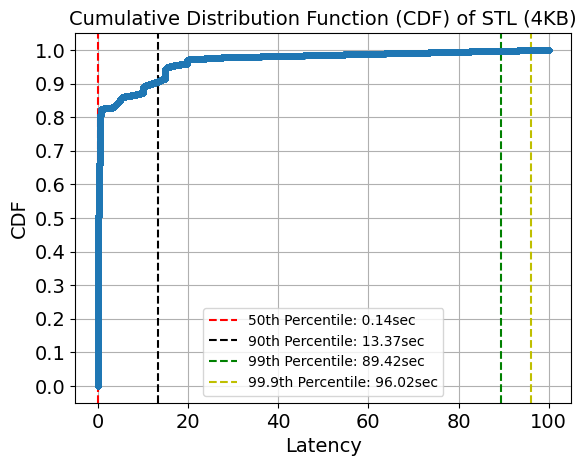

In [334]:
# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/home/surbhi/measurements/worst_case/STL/4K/90-10-LBA/90Util/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)

df['duration'] = round(df['duration']/1e9, 2)
# Step 1: Sort the data
threshold = 100
data = df['duration']
filtered_data = data[data <= threshold]

data_sorted = np.sort(filtered_data)

# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Step 3: Calculate 90th and 99th percentiles
p50 = np.percentile(data, 50)
p90 = np.percentile(data, 90)
p99 = np.percentile(data, 99)

# Step 4: Plot the CDF
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# Mark the 90th and 99th percentiles with vertical lines
plt.axvline(x=p50, color='r', linestyle='--', label='50th Percentile: ' + str(round(p50, 2)) + "sec" )
plt.axvline(x=p90, color='black', linestyle='--', label='90th Percentile: ' + str(round(p90, 2)) + "sec" )
plt.axvline(x=p99, color='g', linestyle='--', label='99th Percentile: ' + str(round(p99, 2)) + "sec")
p999 = np.percentile(data_sorted, 99.9)
plt.axvline(x=p999, color='y', linestyle='--', label='99.9th Percentile: ' + str(round(p999, 2)) + "sec")

plt.legend()
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot(data_sorted, cdf, marker='.', linestyle='none')
plt.xlabel('Latency', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.title('Cumulative Distribution Function (CDF) of STL (4KB)', fontsize=14)
plt.grid(True)
plt.show()

Number of writes with duration between 60 and 125: 1
Number of writes with duration between 225 and 400: 81


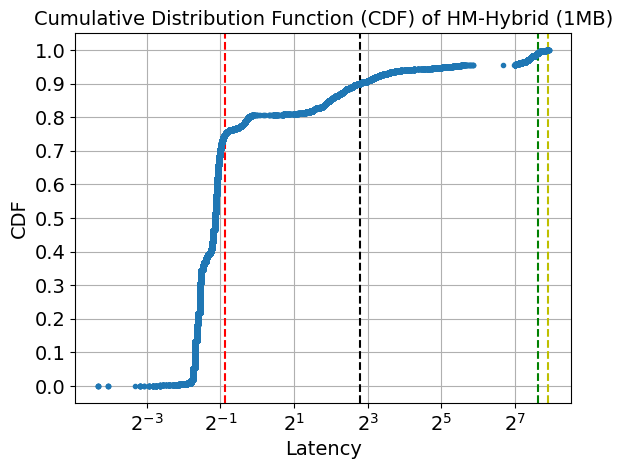

In [337]:
# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/90Util/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)

df['duration'] = round(df['duration']/1e9, 2)
# Step 1: Sort the data
threshold = 1000
data = df['duration']

x=60
y=125
# Filter the DataFrame where the 'duration' column is between x and y
filtered_df = df[(df['duration'] >= x) & (df['duration'] <= y)]

# Count the number of rows that meet the condition
num_writes = len(filtered_df)

print(f"Number of writes with duration between {x} and {y}: {num_writes}")

x=225
y=400
# Filter the DataFrame where the 'duration' column is between x and y
filtered_df = df[(df['duration'] >= x) & (df['duration'] <= y)]

# Count the number of rows that meet the condition
num_writes = len(filtered_df)

print(f"Number of writes with duration between {x} and {y}: {num_writes}")


filtered_data = data[data <= threshold]

data_sorted = np.sort(data)

# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Step 3: Calculate 90th and 99th percentiles
p50 = np.percentile(data, 50)
p75 = np.percentile(data_sorted, 75)
p90 = np.percentile(data, 90)
p99 = np.percentile(data, 99)


# Step 4: Plot the CDF
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# Mark the 90th and 99th percentiles with vertical lines
plt.axvline(x=p75, color='r', linestyle='--', label='75th Percentile: ' + str(round(p75, 2)) + "sec" )
plt.axvline(x=p90, color='black', linestyle='--', label='90th Percentile: ' + str(round(p90, 2)) + "sec" )
plt.axvline(x=p99, color='g', linestyle='--', label='99th Percentile: ' + str(round(p99, 2)) + "sec")
p999 = np.percentile(data, 99.9)
plt.axvline(x=p999, color='y', linestyle='--', label='99.9th Percentile: ' + str(round(p999, 2)) + "sec")

plt.xscale('log', base=2)
#plt.xlim(2**0 , 2**10)
plt.yticks(np.arange(0, 1.1, 0.1))
#plt.xticks(np.arange(0, 250, 25))
plt.legend()
plt.plot(data_sorted, cdf, marker='.', linestyle='none')
plt.xlabel('Latency', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.title('Cumulative Distribution Function (CDF) of HM-Hybrid (1MB)', fontsize=14)
plt.grid(True)
plt.show()

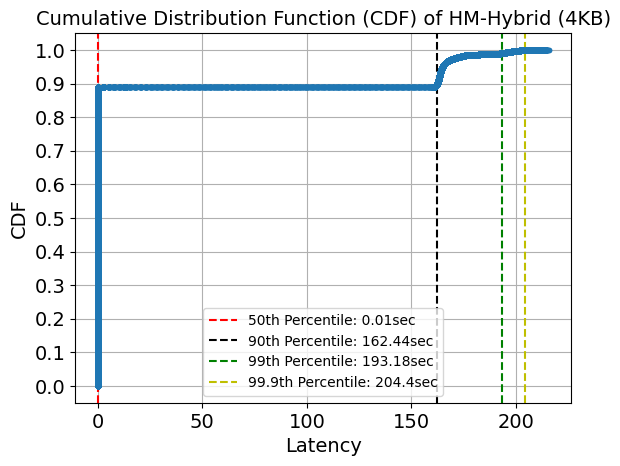

In [336]:
# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/home/surbhi/measurements/worst_case/HM-Hybrid/4KB/90-10-LBA/90Util/15Zones.WakeOne/lat_log_avg_lat.1.log', names=names_latency, usecols=columns)

df['duration'] = round(df['duration']/1e9, 2)
# Step 1: Sort the data
threshold = 600
data = df['duration']
filtered_data = data[data <= threshold]

data_sorted = np.sort(filtered_data)

# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Step 3: Calculate 90th and 99th percentiles
p50 = np.percentile(data, 50)
p90 = np.percentile(data, 90)
p99 = np.percentile(data, 99)

# Step 4: Plot the CDF
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# Mark the 90th and 99th percentiles with vertical lines
plt.axvline(x=p50, color='r', linestyle='--', label='50th Percentile: ' + str(round(p50, 2)) + "sec" )
plt.axvline(x=p90, color='black', linestyle='--', label='90th Percentile: ' + str(round(p90, 2)) + "sec" )
plt.axvline(x=p99, color='g', linestyle='--', label='99th Percentile: ' + str(round(p99, 2)) + "sec")
p999 = np.percentile(data_sorted, 99.9)
plt.axvline(x=p999, color='y', linestyle='--', label='99.9th Percentile: ' + str(round(p999, 2)) + "sec")


plt.legend()
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot(data_sorted, cdf, marker='.', linestyle='none')
plt.xlabel('Latency', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.title('Cumulative Distribution Function (CDF) of HM-Hybrid (4KB)', fontsize=14)
plt.grid(True)
plt.show()